In [3]:
import xgboost as xgb
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


# import lightgbm
# from lightgbm import LGBMClassifier

# import seaborn as sns

In [4]:
red = pd.read_csv('/Users/YuchengZhu/Dropbox/Yucheng Zhu/Northwestern/MSiA 423 Value Chain/Project//MSiA423-Project/data/red.csv',sep=',')


# Data Split


In [5]:
red.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
red.describe() 

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,799.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,399.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,799.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1198.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1598.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red[red.iloc[:,12] >=6 ].describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,842.436257,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854
std,437.223206,1.862795,0.161999,0.199889,1.424835,0.037258,10.038538,27.253280,0.002067,0.154554,0.155558,1.106109,0.491627
min,3.000000,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.390000,8.400000,6.000000
25%,449.500000,7.100000,0.350000,0.115000,1.900000,0.067000,7.000000,20.000000,0.995185,3.210000,0.590000,10.000000,6.000000
50%,898.000000,8.000000,0.460000,0.310000,2.200000,0.077000,13.000000,33.000000,0.996400,3.310000,0.660000,10.800000,6.000000
75%,1193.000000,9.650000,0.580000,0.460000,2.600000,0.087500,20.500000,50.000000,0.997685,3.400000,0.770000,11.700000,7.000000
max,1598.000000,15.600000,1.040000,0.780000,15.400000,0.415000,72.000000,289.000000,1.003690,4.010000,1.950000,14.000000,8.000000


In [8]:
red[red.iloc[:,12] <=4 ].describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,836.650794,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
std,499.594163,1.649284,0.247970,0.207406,1.723735,0.075121,9.076508,26.395123,0.001667,0.175100,0.224323,0.918178,0.368359
min,18.000000,4.600000,0.230000,0.000000,1.200000,0.045000,3.000000,7.000000,0.993400,2.740000,0.330000,8.400000,3.000000
25%,434.000000,6.800000,0.565000,0.020000,1.900000,0.068500,5.000000,13.500000,0.995655,3.300000,0.495000,9.600000,4.000000
50%,833.000000,7.500000,0.680000,0.080000,2.100000,0.080000,9.000000,26.000000,0.996600,3.380000,0.560000,10.000000,4.000000
75%,1284.500000,8.400000,0.882500,0.270000,2.950000,0.094500,15.500000,48.000000,0.997700,3.500000,0.600000,11.000000,4.000000
max,1521.000000,12.500000,1.580000,1.000000,12.900000,0.610000,41.000000,119.000000,1.001000,3.900000,2.000000,13.100000,4.000000


# Histograms

Text(0, 0.5, 'Count')

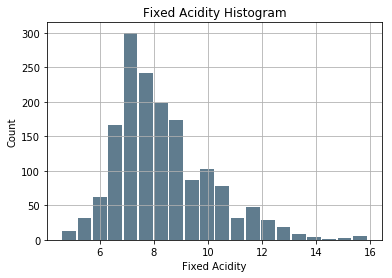

In [63]:
#Fixed Acidity
red.iloc[:,1].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Fixed Acidity Histogram')
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

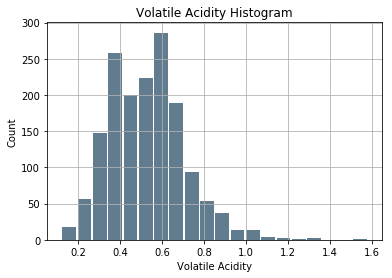

In [64]:
#Volatile Acidity
red.iloc[:,2].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Volatile Acidity Histogram')
plt.xlabel('Volatile Acidity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

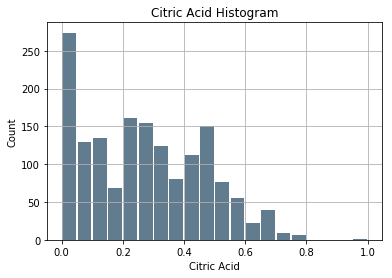

In [65]:
#Citric Acid
red.iloc[:,3].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Citric Acid Histogram')
plt.xlabel('Citric Acid')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

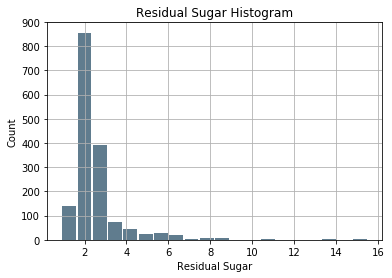

In [66]:
#Residual Sugar
red.iloc[:,4].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Residual Sugar Histogram')
plt.xlabel('Residual Sugar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

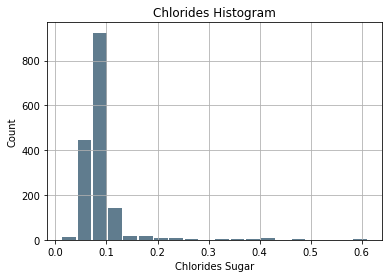

In [67]:
#Chlorides
red.iloc[:,5].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Chlorides Histogram')
plt.xlabel('Chlorides Sugar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

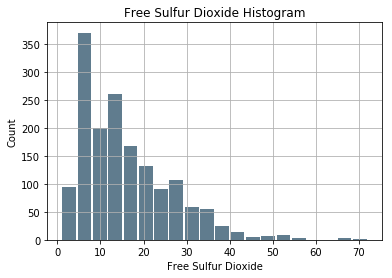

In [68]:
#Free Sulfur Dioxide
red.iloc[:,6].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Free Sulfur Dioxide Histogram')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

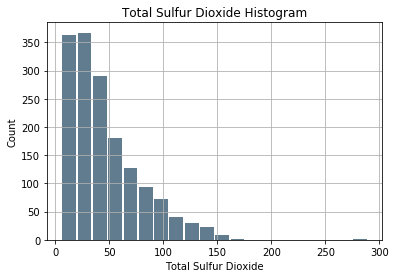

In [69]:
#Total Sulfur Dioxide
red.iloc[:,7].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Total Sulfur Dioxide Histogram')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

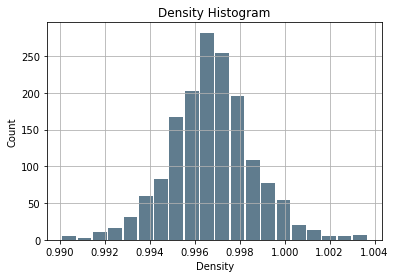

In [70]:
#Density
red.iloc[:,8].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Density Histogram')
plt.xlabel('Density')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

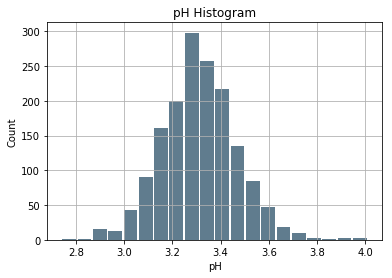

In [71]:
#pH
red.iloc[:,9].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('pH Histogram')
plt.xlabel('pH')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

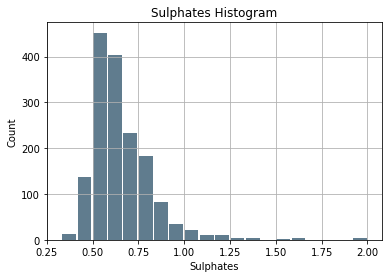

In [72]:
#Sulphates
red.iloc[:,10].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Sulphates Histogram')
plt.xlabel('Sulphates')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

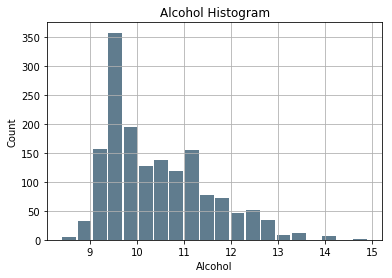

In [73]:
#Alcohol
red.iloc[:,11].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Alcohol Histogram')
plt.xlabel('Alcohol')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

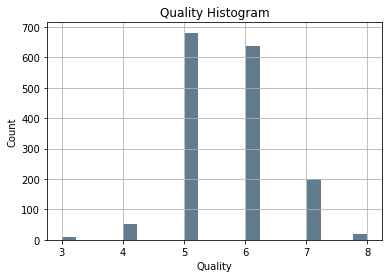

In [74]:
#Quality
red.iloc[:,12].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

plt.title('Quality Histogram')
plt.xlabel('Quality')
plt.ylabel('Count')

# Correlation Matrix

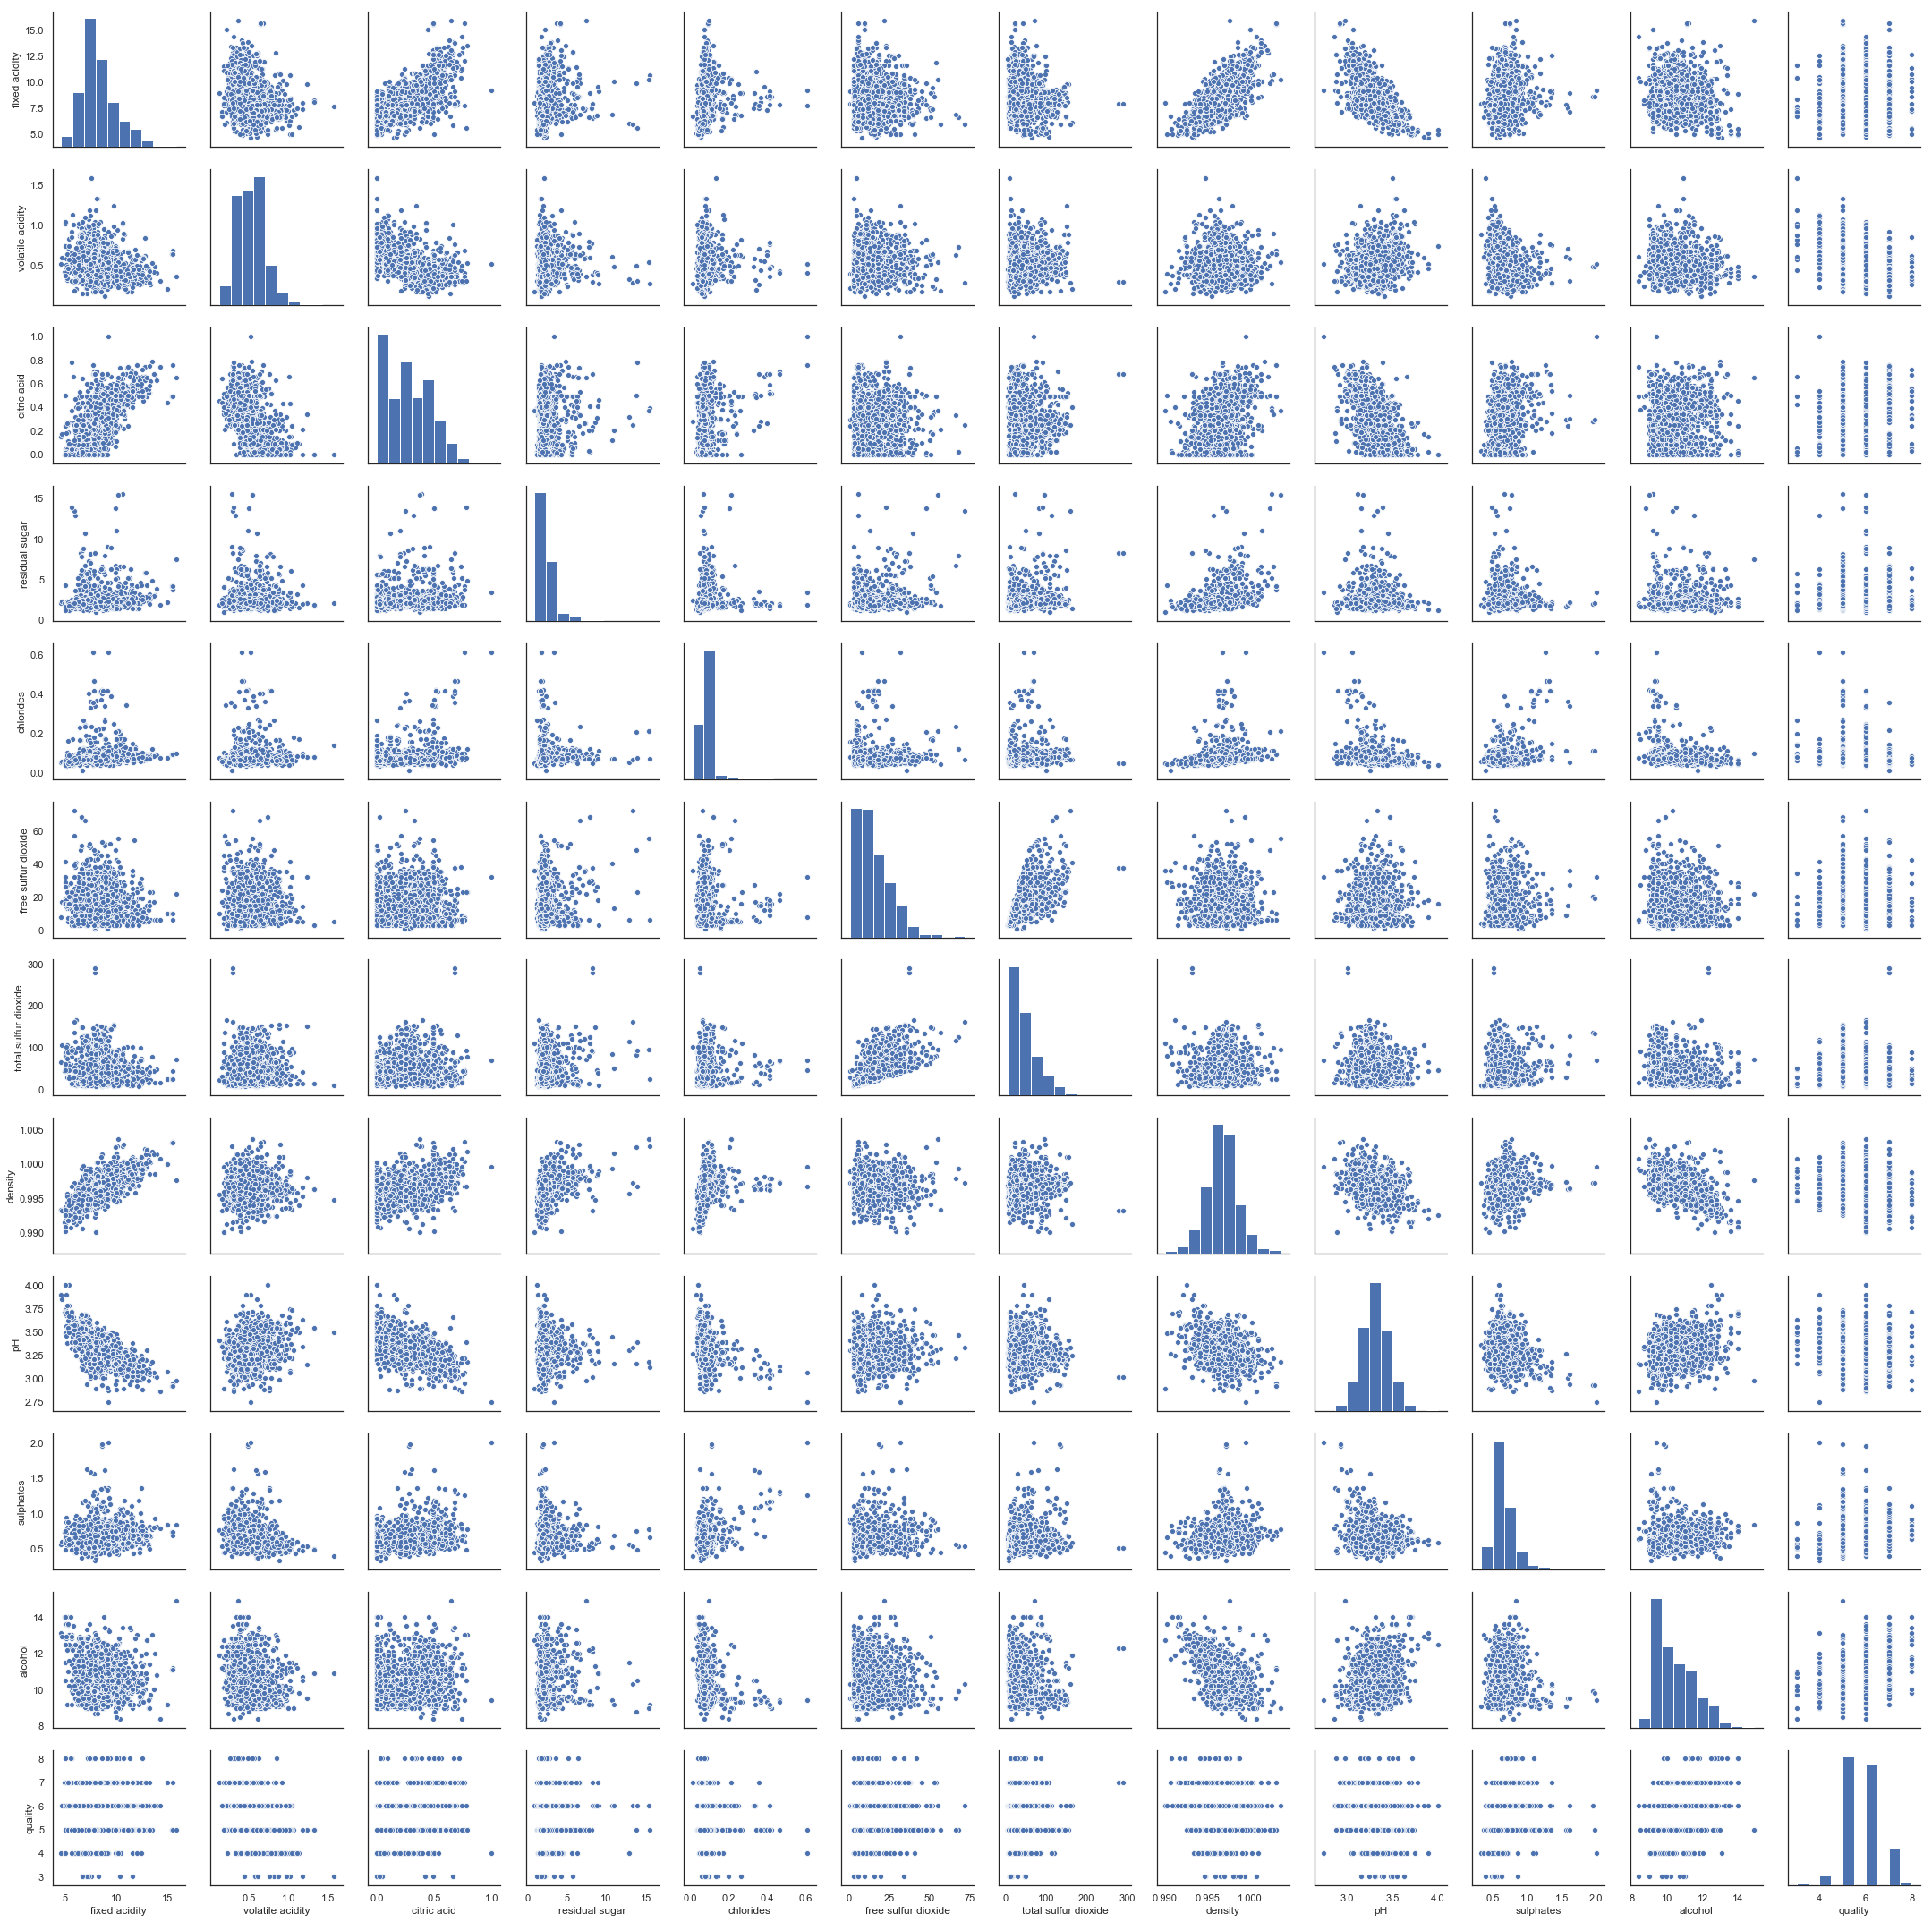

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt



corr= red.iloc[:,1:12].corr()


 
# Basic correlogram
sns.pairplot(red.iloc[:,1:])
plt.show()


In [115]:
# pd.DataFrame(np.corrcoef(red.iloc[:,2,12]))
red.iloc[:,1:13].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [116]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality


bins = (2, 6.5, 8)
group_names = ['bad', 'good']
red['quality'] = pd.cut(red['quality'], bins = bins, labels = group_names)

In [125]:
#Quality



In [10]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [11]:
#Bad becomes 0 and good becomes 1 
red['quality'] = label_quality.fit_transform(red['quality'])

In [12]:
red['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [114]:
#Now seperate the dataset as response variable and feature variabes
X = red.drop('quality', axis = 1)
y = red['quality']

In [117]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

In [118]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest

In [121]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [126]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       275
           1       0.89      0.53      0.67        45

   micro avg       0.93      0.93      0.93       320
   macro avg       0.91      0.76      0.81       320
weighted avg       0.92      0.93      0.92       320



In [127]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[272   3]
 [ 21  24]]


In [131]:
len(X_test)

320

AttributeError: 'numpy.ndarray' object has no attribute 'columns'